<a href="https://colab.research.google.com/github/alptekinynk/Advance-Deep-Learning/blob/main/ADL_Exercise2(cifar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# CNN Model
def create_cnn(input_shape=(32, 32, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax') # Çıkış katmanı
    ])
    return model

In [5]:
# train function
def train_with_optimizer(optimizer, x_train, y_train, x_test, y_test, epochs=10):
    model = create_cnn()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_test, y_test), verbose=1)
    return history

In [6]:
# learning rate and Momentm setting
learning_rates = [0.01, 0.1, 0.2]
momentums = [0.0, 0.5, 0.9]

best_accuracy = 0
best_params = None


Training with learning rate=0.01, momentum=0.0
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2095 - loss: 2.1354 - val_accuracy: 0.2991 - val_loss: 1.9585
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3850 - loss: 1.7129 - val_accuracy: 0.4577 - val_loss: 1.5215
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4667 - loss: 1.4900 - val_accuracy: 0.4566 - val_loss: 1.4875
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5172 - loss: 1.3471 - val_accuracy: 0.5342 - val_loss: 1.2882
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5503 - loss: 1.2718 - val_accuracy: 0.5680 - val_loss: 1.2177
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5810 - loss: 1.1903 - val_accuracy: 0.5428 - val_loss: 1.2829
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6031 - loss: 1.1293 - val_accuracy: 0.5737 - val_loss: 1.1934
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━

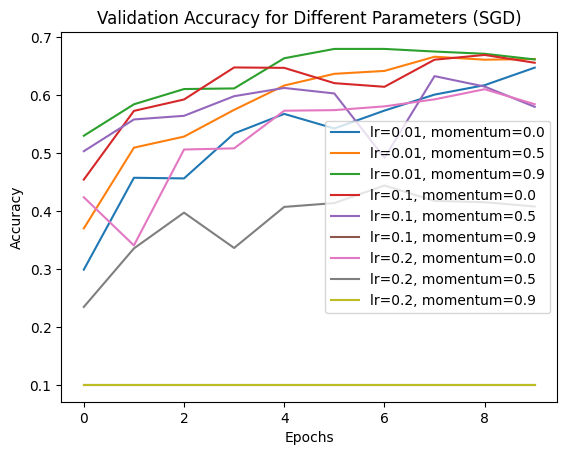

Best parameters: learning_rate=0.1, momentum=0.0 with accuracy=0.67


In [9]:
for lr in learning_rates:
    for momentum in momentums:
        print(f"\nTraining with learning rate={lr}, momentum={momentum}")
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
        history = train_with_optimizer(optimizer, x_train, y_train, x_test, y_test, epochs=10)

        final_val_accuracy = history.history['val_accuracy'][-1]
        if final_val_accuracy > best_accuracy:
            best_accuracy = final_val_accuracy
            best_params = (lr, momentum)

        # plot
        plt.plot(history.history['val_accuracy'], label=f"lr={lr}, momentum={momentum}")

plt.title("Validation Accuracy for Different Parameters (SGD)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print(f"Best parameters: learning_rate={best_params[0]}, momentum={best_params[1]} with accuracy={best_accuracy:.2f}")




Training with SGD
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2730 - loss: 1.9579 - val_accuracy: 0.5042 - val_loss: 1.3765
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5139 - loss: 1.3512 - val_accuracy: 0.5578 - val_loss: 1.2326
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5943 - loss: 1.1419 - val_accuracy: 0.6115 - val_loss: 1.0927
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6426 - loss: 1.0118 - val_accuracy: 0.6306 - val_loss: 1.0761
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6801 - loss: 0.9056 - val_accuracy: 0.6378 - val_loss: 1.0422
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7108 - loss: 0.8231 - val_accuracy: 0.6514 - val_loss: 1.0436
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7368 - loss: 0.7443 - val_accuracy: 0.6787 - val_loss: 0.9649
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.756

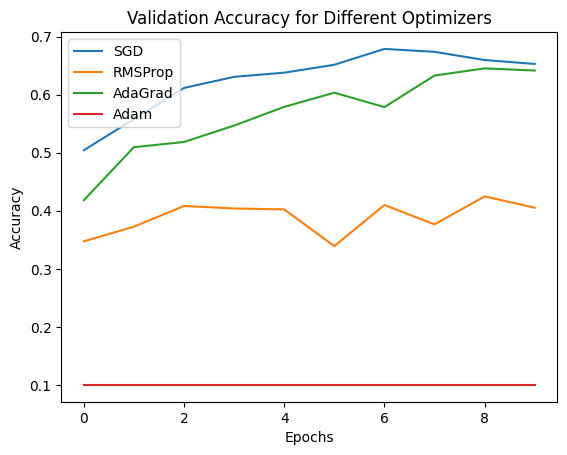

In [10]:
# Optimizer List
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.01),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.01)
}

# Loop optimizer
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name}")
    history = train_with_optimizer(optimizer, x_train, y_train, x_test, y_test, epochs=10)

    # Plot Result
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()